# Introduction

In this tutorial we'll use a grid of probabilities to estimate a population proportion using Bayesian statistics. We'll use [R](https://www.r-project.org/) to carry out the analysis.

In statistical inference we are usually interested in estimating a population parameter using a sample from that population. We take the parameter from the sample and use that as representative for the whole population.

The Bayesian approach to statistics gives us information about the probability distribution of the parameter of interest. 

At Stirling University I teach a module to third year students. Suppose I believe that 10% of students who take my module are capable of getting a first class mark. That 10% isn't set in stone though... I'll entertain anything from 5% to 20%. 

To what degree do I believe in these different percentages? Can I put my money where my mouth is?

To set some probabilities for the different proportion values I think are credible I can arbitrarily set weights on those different proportions reflecting the degree to which I believe in them.

In [1]:
props <- seq(0.05, 0.2, 0.05) # my proportions
wgts <- c(4, 8, 3, 0.5) # my beliefs in each proportion
cbind(props, wgts)

props,wgts
0.05,4.00
0.1,8.0
0.15,3.00
0.2,0.5


Now I can create proabilities for each proportion by dividing through by the total weight thus scaling them to lie in the interval [0,1] and also making sure they sum to 1. 

In [2]:
priors <- round(wgts/sum(wgts),2) # scale to [0,1]
cbind(props, wgts, priors)

props,wgts,priors
0.05,4.00,0.26
0.10,8.00,0.52
0.15,3.00,0.19
0.20,0.50,0.03


The ```priors``` column in the above represents my 'degree of belief' in each proportion as a probability. Since these are discrete probabilities we can plot them as a probability mass.

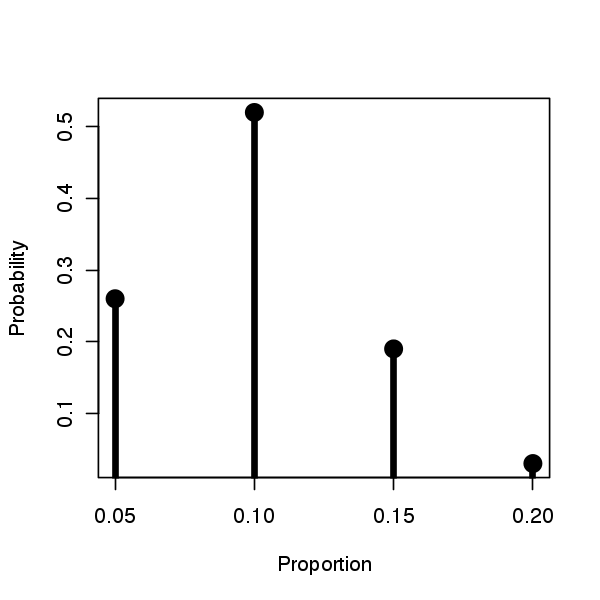

In [3]:
options(repr.plot.width=5, repr.plot.height=5) # plot sizing
plot(props, priors, type='h', xlab = 'Proportion', ylab='Probability', lwd=4)
points(props, priors, pch=16, cex=2)

Clearly at the moment I believe most strongly (p=0.52) that 10% of the students will get a first class mark. 

The marks for 2015 show that 8 out of 104 students got a mark of 70% or more, a proportion of 7.7%. How should this change my belief about the proportion of 10%?

I can use Bayes Theorem to calculate this. Bayes Theorem says:

$$P(\theta | D) = \frac{P(D | \theta)P(\theta)}{P(D)}$$

In English $\theta$ is my proportion (0.05, 0.1, 0.15, 0.2) and $D$ is my data (0.077). Bayes gives me a route to get from the probability of some data given a parameter - $P(D | \theta)$) - to the probability of the parameter given some data - $P(\theta | D)$.

I will set up 4 hypotheses:

* $H_1: \theta = 0.05$. My belief  = 0.26
* $H_2: \theta = 0.10$. My belief  = 0.52
* $H_3: \theta = 0.15$. My belief  = 0.19
* $H_3: \theta = 0.20$. My belief  = 0.03

To get the posterior probability mass I need to calculate $P(D|\theta)$ - the likelihood - for each hypothesis i.e. I need to calculate the likelihood of seeing 8/104 people get a first class mark given the proportion in each hypothesis.

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) allows me to calculate these likelihoods. Basically it gives me the probability of getting $s$ successes in $n$ trials. Here success is defined as a first class mark and there are 104 trials.

The formula for the binomial probability distribution is:

$P(s) = {n \choose s}\theta^s(1-\theta)^{n-s}$

The ${n\choose s}$ part is called the binomial coefficient and is calculated by $\frac{n!}{s!(n-s)!}$.

Plugging in the numbers for the first hypothesis ($H_1: \theta = 0.05$) we get:

$P(8) = {104\choose 8}0.05^8(1-0.05)^{96} = 0.07$

So the likelihood of getting 8 successes out of 104 trials if the 'true' proportion of successes is 5% is 0.07 (or 7%).

```R``` provides a density function for the binomial distribution that allows us to calculate this directly and we can use this to quickly calculate the probabilities for each hypothesis.

[1] 0.0731 0.1043 0.0111 0.0003

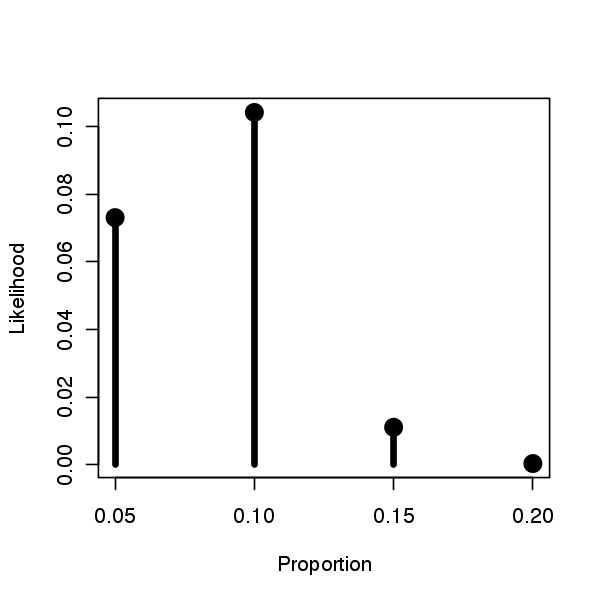

In [6]:
# e.g h1_like <- dbinom(8,104,0.05), but we vectorise this below for each prop

like_vec <- dbinom(8,104,props)
round(like_vec,4)
plot(props, like_vec, type='h', xlab = 'Proportion', ylab='Likelihood', lwd=4)
points(props, like_vec, pch=16, cex=2)

Let's start laying out the different components in a table.

In [7]:
bayes_tab <- data.frame(theta = props, prior = priors, likelihood = round(like_vec,4))
bayes_tab

,theta,prior,likelihood
1,0.0500,0.2600,0.0731
2,0.1000,0.5200,0.1043
3,0.1500,0.1900,0.0111
4,2e-01,3e-02,3e-04


Now we have to calculate the product of the likelihood and the prior - $P(D|\theta)P(\theta)$. This is $P(D|\theta)$ multiplied by how much I believe in each value of $\theta$ i.e. my priors.

In [8]:
like_x_prior <- like_vec * priors
bayes_tab$like_x_prior <- round(like_x_prior,4)
bayes_tab

,theta,prior,likelihood,like_x_prior
1,0.0500,0.2600,0.0731,0.0190
2,0.1000,0.5200,0.1043,0.0542
3,0.1500,0.1900,0.0111,0.0021
4,2e-01,3e-02,3e-04,0e+00


Finally we need to calculate the denominator for Bayes rule i.e. $P(D)$. To do this we sum the likelihood and prior products we have calculated i.e.

$P(\theta) = \Sigma\ {P(D|\theta) P(\theta)}$ 

In [9]:
denom <- sum(bayes_tab$like_x_prior)
round(denom,3)

[1] 0.075

With all these parts in place we can calculate the posterior distribution for our proportions i.e. the products divided by the evidence.

$$P(\theta | D) = \frac{P(D | \theta)P(\theta)}{P(D)}$$

In [10]:
post <- bayes_tab$like_x_prior/denom
round(post,4)

[1] 0.2523 0.7198 0.0279 0.0000

In [11]:
bayes_tab$post <- round(post,4)
bayes_tab

,theta,prior,likelihood,like_x_prior,post
1,0.0500,0.2600,0.0731,0.0190,0.2523
2,0.1000,0.5200,0.1043,0.0542,0.7198
3,0.1500,0.1900,0.0111,0.0021,0.0279
4,2e-01,3e-02,3e-04,0e+00,0e+00


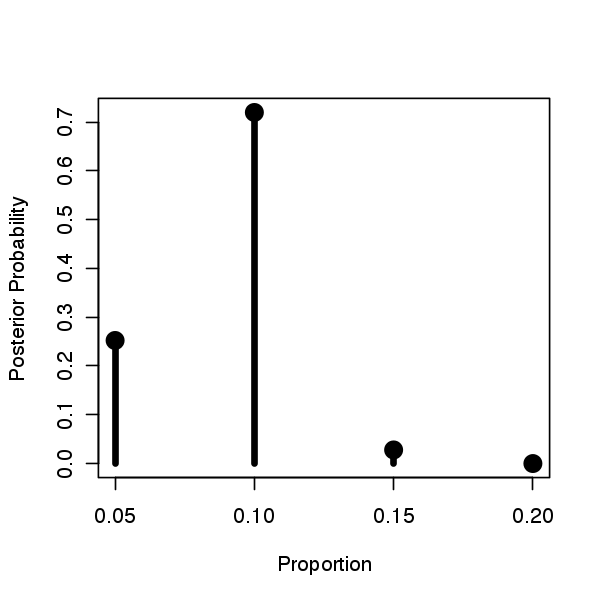

In [12]:
plot(bayes_tab$theta, bayes_tab$post, type='h', xlab='Proportion', ylab='Posterior Probability', lwd=4)
points(bayes_tab$theta, bayes_tab$post, pch=16, cex=2)

So that's fine. These results strengthen my belief that 10% of students will get 70% or more.